In [1]:
import numpy as np
x_test = np.load('/home/jovyan/Edge-IIoT/x_test.npy')
x_train = np.load('/home/jovyan/Edge-IIoT/x_train.npy')
x_val = np.load('/home/jovyan/Edge-IIoT/x_val.npy')
y_test = np.load('/home/jovyan/Edge-IIoT/y_test.npy')
y_train = np.load('/home/jovyan/Edge-IIoT/y_train.npy')
y_val = np.load('/home/jovyan/Edge-IIoT/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
metrics = {
        "model" : '',
        "attack_model" : '',
        "epsilon" : '',
        "Accuracy": '',
        "Precision-micro": '',
        "Precision-macro": '',
        "Precision-weighted": '',
        "F1-micro": '',
        "F1-macro": '',
        "F1-weighted": '',
        "Recall_micro": '',
        "Recall_macro": '',
        "Recall_weighted": '',
        "FPR": '',
        "TPR": '',
        "FNR": '',
        "TNR": '',
        # "AUC": auc
    }
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/Edge-IIoT/transfer_attack/attackmodel.csv", mode='a', index=False)

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/Edge-IIoT/transfer_attack/attackmodel.csv", mode='a', index=False, header=False)

In [5]:
from joblib import dump, load
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb = xgb.fit(x_train, y_train)

dump(xgb, "/home/jovyan/Edge-IIoT/pre_train/XGB.joblib")

model = xgb


epsilon = 0.01
FPR: [0.         0.         0.02468582 0.94724771]
TPR: [0.04093567 0.74647887 0.         1.        ]
FNR: [0.95906433 0.25352113 1.         0.        ]
TNR: [1.         1.         0.97531418 0.05275229]
Accuracy: 0.4911185789726356
Precision(micro,macro,weighted): 0.4911185789726356,0.6225623302888176,0.29179912429533533
F1(micro,macro,weighted: 0.4911185789726356,0.3978582704589068,0.3314491508652265
Recall(micro,macro,weighted: 0.4911185789726356,0.4468536364385141,0.4911185789726356
FPR: 0.2429833808245351
tpr: 0.4468536364385141
fnr: 0.5531463635614858
tnr: 0.7570166191754649


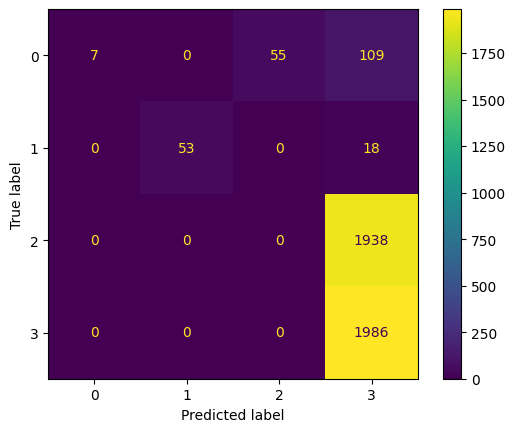

epsilon = 0.1
FPR: [0.         0.         0.02513465 0.94724771]
TPR: [0.03508772 0.74647887 0.         1.        ]
FNR: [0.96491228 0.25352113 1.         0.        ]
TNR: [1.         1.         0.97486535 0.05275229]
Accuracy: 0.49087854056649066
Precision(micro,macro,weighted): 0.49087854056649066,0.6225623302888176,0.29179912429533533
F1(micro,macro,weighted: 0.49087854056649066,0.3951445016529651,0.3310035872878707
Recall(micro,macro,weighted: 0.49087854056649066,0.44539164813442056,0.49087854056649066
FPR: 0.24309558908306295
tpr: 0.44539164813442056
fnr: 0.5546083518655794
tnr: 0.756904410916937


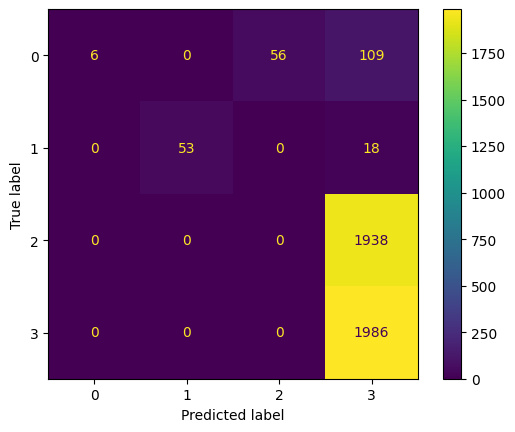

epsilon = 0.2
FPR: [0.         0.         0.02648115 0.94724771]
TPR: [0.01754386 0.74647887 0.         1.        ]
FNR: [0.98245614 0.25352113 1.         0.        ]
TNR: [1.         1.         0.97351885 0.05275229]
Accuracy: 0.4901584253480557
Precision(micro,macro,weighted): 0.4901584253480557,0.6225623302888176,0.29179912429533533
F1(micro,macro,weighted: 0.4901584253480557,0.38681603876576465,0.32963616803322715
Recall(micro,macro,weighted: 0.4901584253480557,0.44100568322213984,0.4901584253480557
FPR: 0.24343221385864644
tpr: 0.44100568322213984
fnr: 0.5589943167778602
tnr: 0.7565677861413537


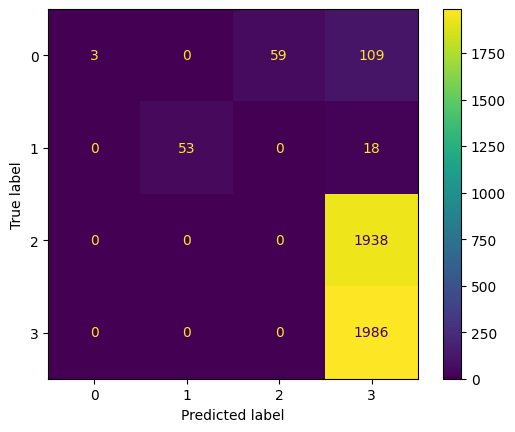

epsilon = 0.3
FPR: [0.         0.         0.02827648 0.94678899]
TPR: [0.         0.74647887 0.         1.        ]
FNR: [1.         0.25352113 1.         0.        ]
TNR: [1.         1.         0.97172352 0.05321101]
Accuracy: 0.48943831012962075
Precision(micro,macro,weighted): 0.48943831012962075,0.3725925925925926,0.25081026297540937
F1(micro,macro,weighted: 0.48943831012962075,0.3782225998845636,0.32827273270540447
Recall(micro,macro,weighted: 0.48943831012962075,0.43661971830985913,0.48943831012962075
FPR: 0.24376636799367518
tpr: 0.43661971830985913
fnr: 0.5633802816901409
tnr: 0.7562336320063249


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


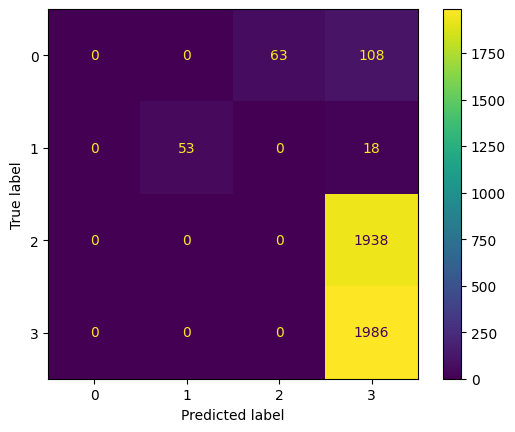

epsilon = 0.01
FPR: [0.         0.         0.02468582 0.94311927]
TPR: [4.09356725e-02 8.59154930e-01 5.15995872e-04 1.00000000e+00]
FNR: [0.95906433 0.14084507 0.999484   0.        ]
TNR: [1.         1.         0.97531418 0.05688073]
Accuracy: 0.4932789246279405
Precision(micro,macro,weighted): 0.4932789246279405,0.6272995157984025,0.3006265508030164
F1(micro,macro,weighted: 0.4932789246279405,0.4157055338130035,0.3335668662420052
Recall(micro,macro,weighted: 0.4932789246279405,0.4751516494910294,0.4932789246279405
FPR: 0.241951270732792
tpr: 0.4751516494910294
fnr: 0.5248483505089706
tnr: 0.758048729267208


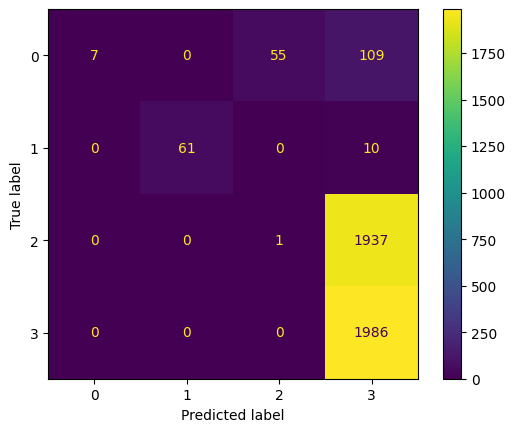

epsilon = 0.1
FPR: [0.01827284 0.         0.02513465 0.90963303]
TPR: [0.04093567 0.85915493 0.         1.        ]
FNR: [0.95906433 0.14084507 1.         0.        ]
TNR: [0.98172716 1.         0.97486535 0.09036697]
Accuracy: 0.4930388862217955
Precision(micro,macro,weighted): 0.4930388862217955,0.39696948223733936,0.25917260367100914
F1(micro,macro,weighted: 0.4930388862217954,0.41175545889109766,0.33601201710169987
Recall(micro,macro,weighted: 0.4930388862217955,0.4750226505230212,0.4930388862217955
FPR: 0.2382601296211208
tpr: 0.4750226505230212
fnr: 0.5249773494769788
tnr: 0.7617398703788792


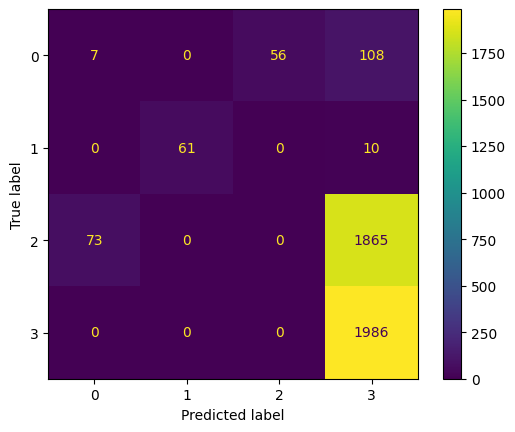

epsilon = 0.2
FPR: [0.03329161 0.         0.02648115 0.88211009]
TPR: [0.02339181 0.85915493 0.         1.        ]
FNR: [0.97660819 0.14084507 1.         0.        ]
TNR: [0.96670839 1.         0.97351885 0.11788991]
Accuracy: 0.4923187710033605
Precision(micro,macro,weighted): 0.4923187710033605,0.38431385180745165,0.2604408396611783
F1(micro,macro,weighted: 0.4923187710033605,0.40600194970423975,0.3380250573411861
Recall(micro,macro,weighted: 0.4923187710033605,0.47063668561074046,0.4923187710033605
FPR: 0.23547071381845858
tpr: 0.47063668561074046
fnr: 0.5293633143892595
tnr: 0.7645292861815415


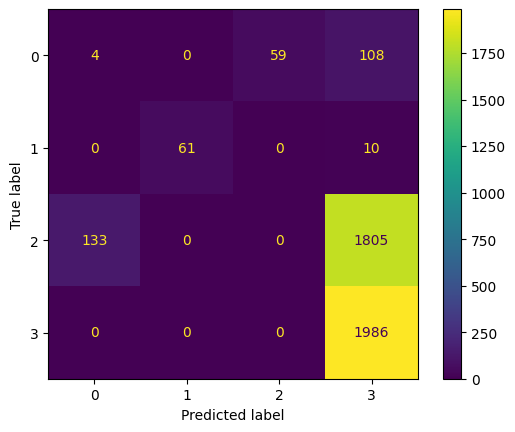

epsilon = 0.3
FPR: [0.04881101 0.         0.02827648 0.85366972]
TPR: [0.         0.85915493 0.         1.        ]
FNR: [1.         0.14084507 1.         0.        ]
TNR: [0.95118899 1.         0.97172352 0.14633028]
Accuracy: 0.4913586173787806
Precision(micro,macro,weighted): 0.4913586173787806,0.3790616064465817,0.2631457997147492
F1(micro,macro,weighted: 0.4913586173787806,0.4012989053919964,0.34037308257555865
Recall(micro,macro,weighted: 0.4913586173787806,0.4647887323943662,0.4913586173787806
FPR: 0.23268930492171594
tpr: 0.4647887323943662
fnr: 0.5352112676056338
tnr: 0.7673106950782841


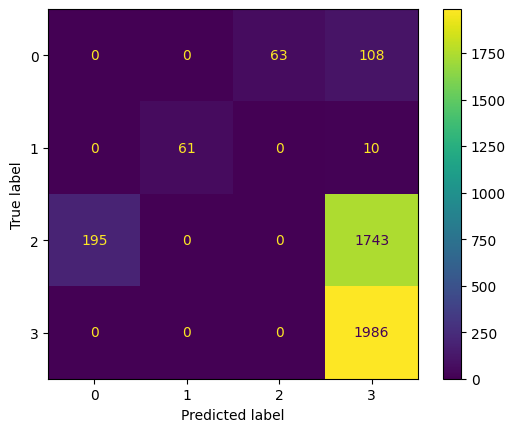

epsilon = 0.01
FPR: [0.         0.         0.02468582 0.94311927]
TPR: [4.09356725e-02 8.59154930e-01 5.15995872e-04 1.00000000e+00]
FNR: [0.95906433 0.14084507 0.999484   0.        ]
TNR: [1.         1.         0.97531418 0.05688073]
Accuracy: 0.4932789246279405
Precision(micro,macro,weighted): 0.4932789246279405,0.6272995157984025,0.3006265508030164
F1(micro,macro,weighted: 0.4932789246279405,0.4157055338130035,0.3335668662420052
Recall(micro,macro,weighted: 0.4932789246279405,0.4751516494910294,0.4932789246279405
FPR: 0.241951270732792
tpr: 0.4751516494910294
fnr: 0.5248483505089706
tnr: 0.758048729267208


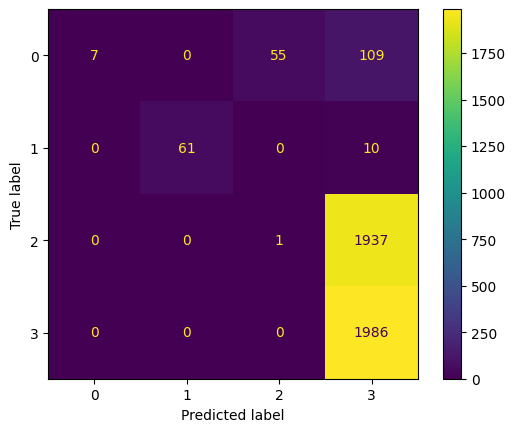

epsilon = 0.1
FPR: [0.01827284 0.         0.02513465 0.90963303]
TPR: [0.04093567 0.85915493 0.         1.        ]
FNR: [0.95906433 0.14084507 1.         0.        ]
TNR: [0.98172716 1.         0.97486535 0.09036697]
Accuracy: 0.4930388862217955
Precision(micro,macro,weighted): 0.4930388862217955,0.39696948223733936,0.25917260367100914
F1(micro,macro,weighted: 0.4930388862217954,0.41175545889109766,0.33601201710169987
Recall(micro,macro,weighted: 0.4930388862217955,0.4750226505230212,0.4930388862217955
FPR: 0.2382601296211208
tpr: 0.4750226505230212
fnr: 0.5249773494769788
tnr: 0.7617398703788792


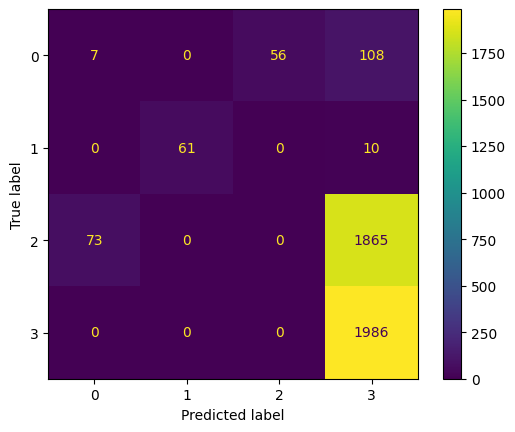

epsilon = 0.2
FPR: [0.03379224 0.         0.02648115 0.88119266]
TPR: [0.02339181 0.85915493 0.         1.        ]
FNR: [0.97660819 0.14084507 1.         0.        ]
TNR: [0.96620776 1.         0.97351885 0.11880734]
Accuracy: 0.4923187710033605
Precision(micro,macro,weighted): 0.4923187710033605,0.38427384532097897,0.26054757834914033
F1(micro,macro,weighted: 0.4923187710033605,0.4060172249030818,0.3381271921575661
Recall(micro,macro,weighted: 0.4923187710033605,0.47063668561074046,0.4923187710033605
FPR: 0.23536651246585039
tpr: 0.47063668561074046
fnr: 0.5293633143892595
tnr: 0.7646334875341496


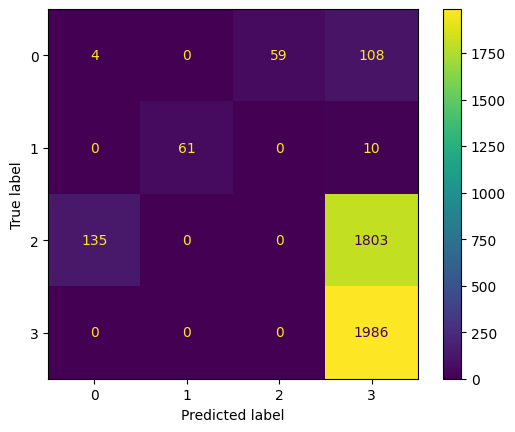

epsilon = 0.3
FPR: [0.04881101 0.         0.02827648 0.85366972]
TPR: [0.         0.85915493 0.         1.        ]
FNR: [1.         0.14084507 1.         0.        ]
TNR: [0.95118899 1.         0.97172352 0.14633028]
Accuracy: 0.4913586173787806
Precision(micro,macro,weighted): 0.4913586173787806,0.3790616064465817,0.2631457997147492
F1(micro,macro,weighted: 0.4913586173787806,0.4012989053919964,0.34037308257555865
Recall(micro,macro,weighted: 0.4913586173787806,0.4647887323943662,0.4913586173787806
FPR: 0.23268930492171594
tpr: 0.4647887323943662
fnr: 0.5352112676056338
tnr: 0.7673106950782841


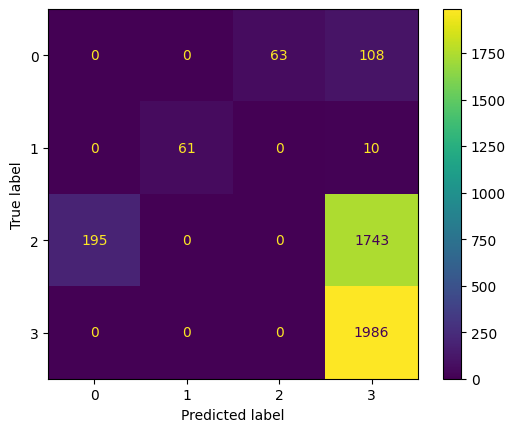

epsilon = 1e-07
FPR: [0.26583229 0.0043956  0.43850987 0.96697248]
TPR: [0.       0.       0.000516 0.      ]
FNR: [1.       1.       0.999484 1.      ]
TNR: [0.73416771 0.9956044  0.56149013 0.03302752]
Accuracy: 0.00024003840614498319
Precision(micro,macro,weighted): 0.00024003840614498319,0.0002556237218813906,0.0004756589275142919
F1(micro,macro,weighted: 0.00024003840614498319,0.00017146776406035664,0.0003190633958223439
Recall(micro,macro,weighted: 0.00024003840614498319,0.00012899896800825592,0.00024003840614498316
FPR: 0.4189275615373822
tpr: 0.00012899896800825592
fnr: 0.9998710010319918
tnr: 0.5810724384626178


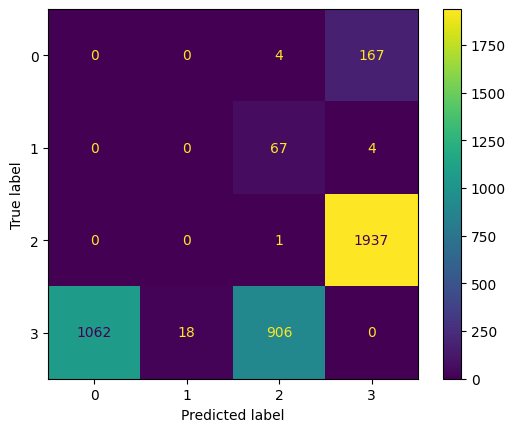

epsilon = 1e-06
FPR: [0.26583229 0.0043956  0.43850987 0.96697248]
TPR: [0.       0.       0.000516 0.      ]
FNR: [1.       1.       0.999484 1.      ]
TNR: [0.73416771 0.9956044  0.56149013 0.03302752]
Accuracy: 0.00024003840614498319
Precision(micro,macro,weighted): 0.00024003840614498319,0.0002556237218813906,0.0004756589275142919
F1(micro,macro,weighted: 0.00024003840614498319,0.00017146776406035664,0.0003190633958223439
Recall(micro,macro,weighted: 0.00024003840614498319,0.00012899896800825592,0.00024003840614498316
FPR: 0.4189275615373822
tpr: 0.00012899896800825592
fnr: 0.9998710010319918
tnr: 0.5810724384626178


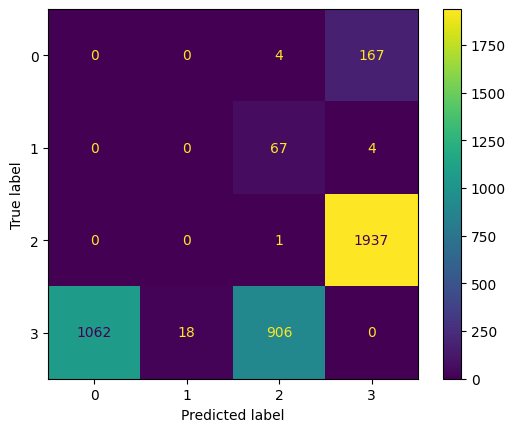

epsilon = 1e-05
FPR: [0.26583229 0.0043956  0.43850987 0.96697248]
TPR: [0.       0.       0.000516 0.      ]
FNR: [1.       1.       0.999484 1.      ]
TNR: [0.73416771 0.9956044  0.56149013 0.03302752]
Accuracy: 0.00024003840614498319
Precision(micro,macro,weighted): 0.00024003840614498319,0.0002556237218813906,0.0004756589275142919
F1(micro,macro,weighted: 0.00024003840614498319,0.00017146776406035664,0.0003190633958223439
Recall(micro,macro,weighted: 0.00024003840614498319,0.00012899896800825592,0.00024003840614498316
FPR: 0.4189275615373822
tpr: 0.00012899896800825592
fnr: 0.9998710010319918
tnr: 0.5810724384626178


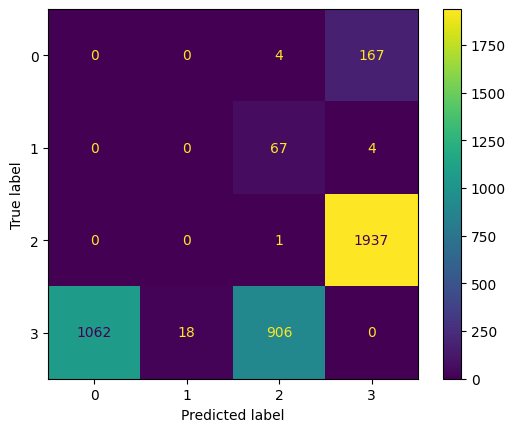

epsilon = 0.0001
FPR: [0.26583229 0.0043956  0.43850987 0.96697248]
TPR: [0.       0.       0.000516 0.      ]
FNR: [1.       1.       0.999484 1.      ]
TNR: [0.73416771 0.9956044  0.56149013 0.03302752]
Accuracy: 0.00024003840614498319
Precision(micro,macro,weighted): 0.00024003840614498319,0.0002556237218813906,0.0004756589275142919
F1(micro,macro,weighted: 0.00024003840614498319,0.00017146776406035664,0.0003190633958223439
Recall(micro,macro,weighted: 0.00024003840614498319,0.00012899896800825592,0.00024003840614498316
FPR: 0.4189275615373822
tpr: 0.00012899896800825592
fnr: 0.9998710010319918
tnr: 0.5810724384626178


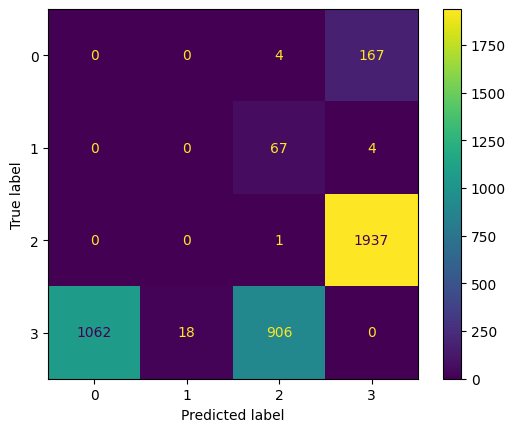

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attack/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "FGSM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attack/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "BIM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attack/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "PGD", epsilon)

DF_eps = [1e-07, 1e-06, 1e-05, 1e-04]
for epsilon in DF_eps:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attack/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "DF", epsilon)